<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weekthree/channels_and_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
symbol_rate = 10e9 #10 gigabauds
EDFA_total_power = 15 #dbm
lambda_light = 1540e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
EDFA_noise = 4.7
discrete_losses = np.zeros(length)
measured_nm =[1517, 1517.1683, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.72, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.72, 1552.1225, 1552.52, 1552.926, 1553.328, 1553.73, 1554.134, 1554.537, 1554.94, 1555.34, 1555.747, 1556.15, 1556.55, 1556.96, 1557.36, 1557.768, 1557.768, 1558.17, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.2, 1560.6, 1561.012, 1561.42, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.27, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.72, 1567.13, 1567.54, 1567.95, 1568.36, 1568.36, 1568.77, 1569.18, 1569.594, 1570, 1570.416, 1570.83, 1571.239, 1571.65, 1572.06, 1572.475, 1572.888, 1573.3, 1573.71, 1574.127, 1574.54, 1574.95, 1575.367, 1575.78, 1576.196, 1576.61, 1577.03, 1577.44, 1577.85, 1578.27, 1578.686, 1579.102, 1579.52, 1579.94, 1580.35, 1581]
measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]


In [274]:
#This code is AI- assisted and is used for the generation of psuedorandom data to test the dispersion
def gen_random_data(type, amount):
  if type == '16qam':
    # 1. Generate random bits
    random_bits = np.random.randint(0, 2, 4*amount)

    # 2. Reshape into groups of 4 bits
    bit_groups = random_bits.reshape(-1, 4)

    # 3. Map 4-bit groups to 16-QAM constellation points
    # Define the 16-QAM constellation mapping
    qam16_mapping = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1): 1 + 1j
    }

    qam16_symbols = np.array([qam16_mapping[tuple(group)] for group in bit_groups])
    return qam16_symbols
  elif type == 'qpsk':
    # 1. Generate random bits
    random_bits_qpsk = np.random.randint(0, 2, 2*amount)

    # 2. Reshape into groups of 2 bits
    bit_groups_qpsk = random_bits_qpsk.reshape(-1, 2)

    # 3. Map 2-bit groups to QPSK constellation points
    # Define the QPSK constellation mapping
    qpsk_mapping = {
        (0, 0): -1 - 1j,
        (0, 1): -1 + 1j,
        (1, 0):  1 - 1j,
        (1, 1):  1 + 1j
    }

    qpsk_symbols = np.array([qpsk_mapping[tuple(group)] for group in bit_groups_qpsk])
    return qpsk_symbols
  elif type == 'bpsk':
    # 1. Generate random bits (0 or 1)
    random_bits_bpsk = np.random.randint(0, 2, amount)

    # 2. Map these bits to BPSK constellation points: 0 maps to -1, and 1 maps to 1.
    # This can be done by multiplying by 2 and subtracting 1: 0*2 - 1 = -1, 1*2 - 1 = 1
    bpsk_symbols = 2 * random_bits_bpsk - 1


def attenuate(signal,attenuation,location,length):
  #Takes the signal in mW, an attenuation in db/km, a location (index) for the signal, and a length in km
  #Works forward, such that it can be used on location 0 but not location 3000 (no more fiber to attenuate in)
  if location + 1 < length:
    signal[location+1] = signal[location]*10**(-attenuation / 10)


def const_power_EDFA(signal, noise, const_power,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_power is the power to return to (initial power generally), wavelength of the light, EDFA noise figure, and the location along the fiber
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  total_input_power = signal[location] + noise[location]
  power_ase_per_amp_mW = planks_const * f_light * EDFA_noise_linear * bandwidth_freq *1000# (mW)
  total_power_after_ase = total_input_power + power_ase_per_amp_mW
  scaling_factor = const_power / total_power_after_ase if total_power_after_ase > 1e-15 else 0
  signal[location] *= scaling_factor
  noise[location] *= scaling_factor

def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    epsilon = 1e-20  # Small value to prevent division by zero
    # 2. Calculate the current total power for each channel at the specified location
    current_total_power_mW_per_channel = multi_channel_signal_power[:, location] + multi_channel_noise[:, location]
    # 3. Convert the target_total_power_dBm to a linear power scale (mW)
    target_total_power_mW = 10**(target_total_power_dBm / 10)
    # Calculate the average current total power across all channels at the location
    # This is used as a reference to calculate the required gain for each channel
    average_current_total_power_mW = np.mean(current_total_power_mW_per_channel)
    # 4. Calculate the required gain for each channel to reach the target spectral shape
    # We want each channel to have a power proportional to the average, scaled to the target total power
    # This effectively flattens the spectrum to the average shape
    required_gain_linear_per_channel = (average_current_total_power_mW + epsilon) / (current_total_power_mW_per_channel + epsilon)
    # We also need to scale the overall power to the target total power
    current_sum_total_power_mW = np.sum(current_total_power_mW_per_channel)
    overall_scaling_factor = target_total_power_mW / (current_sum_total_power_mW + epsilon)

    # Combine the spectral flattening gain with the overall power scaling
    total_gain_linear_per_channel = required_gain_linear_per_channel * overall_scaling_factor
    # 5. Apply the calculated linear gains to both the signal and noise power
    multi_channel_signal_power[:, location] *= total_gain_linear_per_channel
    multi_channel_noise[:, location] *= total_gain_linear_per_channel

def const_power_EDFA_with_tilt_corrected(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise, location, gain_tilt_dB):
    #In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    #In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength)

    total_input_power_mW = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    target_total_power_mW = 10**(const_power_dBm/10)

    if total_input_power_mW < 1e-15:
        overall_linear_gain_needed = 0
    else:
        overall_linear_gain_needed = target_total_power_mW / total_input_power_mW

    avg_gain_dB = np.mean(gain_tilt_dB)
    linear_gain_tilt_scaling = 10**((gain_tilt_dB - avg_gain_dB) / 10)

    new_gains_linear = overall_linear_gain_needed * linear_gain_tilt_scaling

    linear_gains_applied = new_gains_linear
    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (linear_gains_applied - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0

    multi_channel_signal_power[:, location] *= new_gains_linear
    multi_channel_noise[:, location] *= new_gains_linear
    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel


# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

def shape_signal(data,sps,num_weights,symbol_rate):
  #Takes the raw data in any format, the samples per signal, the number of weights for the filter, and the symbol rate
  #returns the signal where each pulse is replaced by a root raised cosine.
  sampling_rate = sps * symbol_rate
  time_step = 1 / sampling_rate # 1 / (500 * 10^9) seconds = 2 * 10^-12 seconds = 2 ps
  #RRC
  fs = sps
  alpha = 0.1
  x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/fs
  raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

  #pulse shaping
  # 1. Upsample the symbols by inserting zeros
  upsampled_symbols = np.zeros(len(data) * sps, dtype=complex)
  upsampled_symbols[::sps] = data

  # 2. Convolve the upsampled signal with the raised_cos_weights filter.
  shaped_signal = np.convolve(upsampled_symbols, raised_cos_weights, mode='full')
  return shaped_signal

#chomatic disperson
def chrom_dispersion_total(positive_amount,negative_amount,lambda_signal, Is_Compensated, length,span):
  distance = np.arange(0,length,1)
  dispersion = np.zeros(len(distance))
  pos_dispersion = positive_amount*lambda_signal*1e9
  neg_dispersion = negative_amount*lambda_signal*1e9
  if(Is_Compensated):
    accumulated_dispersion = 0
    current_slope = pos_dispersion # Start with the positive slope
    for i in range(1, length):
        # Check if we are at a span boundary
        if i % span == 0:
            # Swap the slope between positive_amount and negative_amount
            if current_slope == pos_dispersion:
                current_slope = neg_dispersion
            else:
                current_slope = pos_dispersion
        accumulated_dispersion += current_slope # Add dispersion based on the current slope
        dispersion[i] = accumulated_dispersion

  else:
    dispersion = distance*positive_amount # Only positive dispersion if not compensated

  return dispersion

In [255]:
def const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise, location, gain_tilt_dB):
    # In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    # In mW:  both multi channel inputs

    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength # Assuming wavelength is the center wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength) # Bandwidth in frequency

    # Get input power for current location in mW
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)

    target_total_power_mW = 10**(const_power_dBm/10)
    epsilon = 1e-20

    # Ensure total input power is not zero or negative
    total_input_power_mW_sum = np.maximum(total_input_power_mW_sum, epsilon)

    # Calculate the target output power per channel based on the spectral tilt (gain_tilt_dB)
    # We need to scale this target profile so its sum equals target_total_power_mW
    gain_tilt_linear = 10**(gain_tilt_dB / 10)

    # Calculate the desired output power distribution shape based on the gain tilt
    # Normalize this shape so its sum can be scaled to the target total output power
    desired_output_shape_linear = gain_tilt_linear * (total_input_power_mW_per_channel + epsilon) # Scale tilt by input power shape
    normalized_desired_output_shape_linear = desired_output_shape_linear / (np.sum(desired_output_shape_linear) + epsilon)


    # Calculate the target output power for each channel in mW
    target_output_power_mW_per_channel = normalized_desired_output_shape_linear * target_total_power_mW

    # Calculate the required linear gain for each channel to reach its target output power
    # Ensure input power per channel is not zero before division
    required_gain_linear_per_channel = target_output_power_mW_per_channel / (total_input_power_mW_per_channel + epsilon)


    # Apply the calculated gains to signal and noise separately
    actual_gain_applied_linear_per_channel = required_gain_linear_per_channel # The calculated required gain is the actual applied gain

    multi_channel_signal_power[:, location] = current_signal_input_mW * actual_gain_applied_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * actual_gain_applied_linear_per_channel

    # Add ASE noise *after* amplification
    # The ASE noise power depends on the gain applied to each channel
    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (actual_gain_applied_linear_per_channel - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0 # Ensure non-negative ASE noise

    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel

    # Re-normalize the total power to the target in case of minor deviations (optional but good for strict constant power)
    current_total_output_mW_sum = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    final_scaling_factor = target_total_power_mW / (current_total_output_mW_sum + epsilon)

    multi_channel_signal_power[:, location] *= final_scaling_factor
    multi_channel_noise[:, location] *= final_scaling_factor

Text(0, 0.5, 'Amplification (dB)')

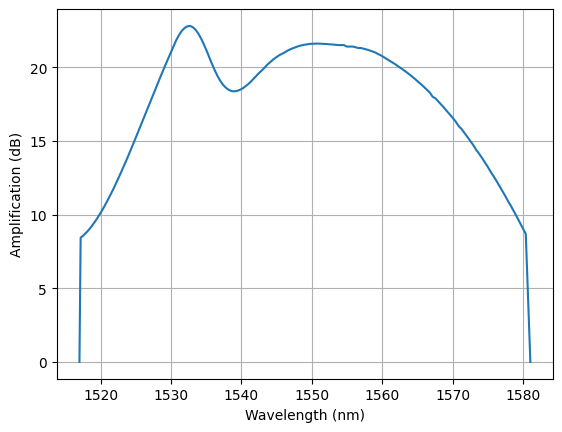

In [256]:
plt.plot(measured_nm,measured_db)
plt.xlabel('Wavelength (nm)')
plt.grid()
plt.ylabel('Amplification (dB)')

In [257]:
channels = 70
signal_length = 5000
channeled_lambdas = np.zeros(channels)
signals = np.zeros((channels, signal_length), dtype=complex)
gain_weights = np.zeros(channels)
channel_power = np.zeros(channels)
total_chrom_dispersion = np.zeros((channels,length))
def find_closest_numpy(data_array, target):
    idx = np.abs(data_array - target).argmin()
    return data_array[idx]

for i in range(channels):
  channel_power = EDFA_total_power-10*np.log10(channels)
  channeled_lambdas[i] = lambda_light + i*0.4e-9
  signals[i] = gen_random_data('16qam', signal_length)
  gain_weights[i] = measured_db[measured_nm.index(find_closest_numpy(measured_nm, channeled_lambdas[i]*1e9))]
print(gain_weights)

[18.56 18.7  18.85 19.03 19.23 19.43 19.63 19.8  20.   20.2  20.37 20.53
 20.67 20.8  20.9  21.   21.12 21.21 21.29 21.36 21.43 21.48 21.52 21.55
 21.58 21.59 21.6  21.6  21.59 21.58 21.57 21.55 21.54 21.52 21.5  21.5
 21.5  21.4  21.4  21.4  21.36 21.3  21.3  21.25 21.2  21.14 21.07 21.
 20.89 20.8  20.68 20.56 20.56 20.44 20.32 20.2  20.06 19.93 19.79 19.65
 19.5  19.34 19.18 19.   18.84 18.66 18.47 18.28 18.   17.88]


In [258]:
attenuation = 0.18
distance_points = np.arange(0, length + 1, 1) # Array of distance points
starting_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
starting_power_mW = 10**(starting_power_per_channel_dBm / 10)
multi_channel_signal_power_iter = np.full((channels, length + 1), starting_power_mW)
multi_channel_noise_iter = np.zeros((channels, length + 1))


attenuation_linear_per_km = 10**(-attenuation / 10)

for i in range(1, length + 1):

    multi_channel_signal_power_iter[:, i] = multi_channel_signal_power_iter[:, i-1] * attenuation_linear_per_km
    multi_channel_noise_iter[:, i] = multi_channel_noise_iter[:, i-1] * attenuation_linear_per_km
    if i % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power_iter, multi_channel_noise_iter, EDFA_total_power, channeled_lambdas, EDFA_noise, i, gain_weights)
multi_channel_signal_power_iter_flat_run = multi_channel_signal_power_iter
multi_channel_noise_iter_iter_flat_run = multi_channel_noise_iter

multi_channel_noise_iter_flat_run = multi_channel_noise_iter


<StemContainer object of 3 artists>

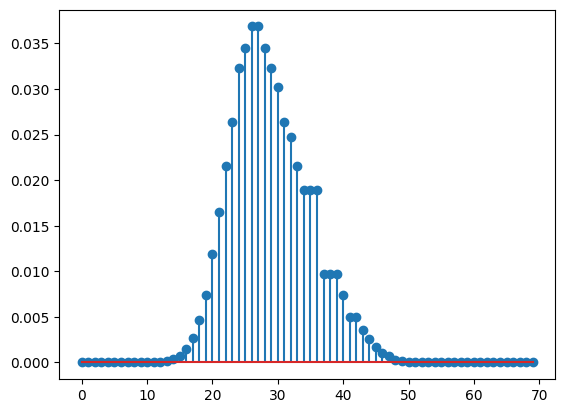

In [259]:
final_powers = np.zeros(channels)
for i in range(channels):
  final_powers[i] = multi_channel_signal_power_iter[i,length-1]
channel_axis = np.arange(0,channels,1)
plt.stem(channel_axis,final_powers)

New Initial Values (Pre-emphasized SIGNAL) in mW for Flat TOTAL Output (Constrained Launch Power):


array([1.93948766e+00, 1.58776495e+00, 1.27102202e+00, 9.60776985e-01,
       6.90799505e-01, 4.84491835e-01, 3.28024354e-01, 2.25012334e-01,
       1.29373238e-01, 5.65130131e-02, 1.75644722e-02, 3.13656313e-03,
       4.07021267e-04, 4.31802110e-05, 6.62766088e-06, 9.40097564e-07,
       8.48391249e-08, 1.36148310e-08, 2.64815841e-09, 6.28572091e-10,
       1.48675317e-10, 5.30082630e-11, 2.32125148e-11, 1.24914176e-11,
       6.72039287e-12, 5.46561851e-12, 4.44502296e-12, 4.44509437e-12,
       5.46588852e-12, 6.72096030e-12, 8.26403623e-12, 1.24932410e-11,
       1.53604446e-11, 2.32175676e-11, 3.50894674e-11, 3.50901968e-11,
       3.50909255e-11, 2.76021747e-10, 2.76029534e-10, 2.76037314e-10,
       6.29002128e-10, 2.15890898e-09, 2.15899515e-09, 6.01810514e-09,
       1.67235026e-08, 5.67039159e-08, 2.33242315e-07, 9.44400720e-07,
       8.09243720e-06, 4.37411617e-05, 3.54023812e-04, 2.18775986e-03,
       2.18980537e-03, 9.50955599e-03, 2.84209154e-02, 6.18853300e-02,
      

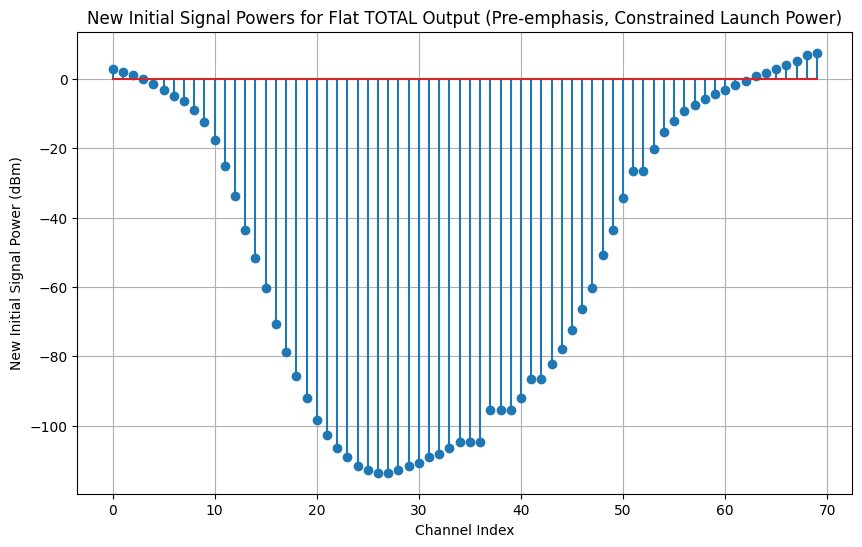


Total Launched Signal Power (Sum of New Initial Values) (mW): 31.62277660168379
Total Launched Signal Power (Sum of New Initial Values) (dBm): 15.0


In [260]:
initial_flat_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
initial_flat_power_mW_single_channel = 10**(initial_flat_power_per_channel_dBm / 10)

final_signal_powers_flat_run = multi_channel_signal_power_iter_flat_run[:, length] # Use length for final location
final_noise_powers_flat_run = multi_channel_noise_iter_iter_flat_run[:, length] # Use length for final location
final_total_powers_flat_run = final_signal_powers_flat_run + final_noise_powers_flat_run

final_total_powers_for_preemphasis = final_total_powers_flat_run

target_total_launch_power_dBm = EDFA_total_power
target_total_launch_power_mW = 10**(target_total_launch_power_dBm/10)

epsilon = 1e-20

# Calculate the relative gain needed for each channel to reach the target total power
# This is based on the inverse of the final total power from the flat launch run
relative_gain_needed = target_total_launch_power_mW / (final_total_powers_for_preemphasis + epsilon)

# Normalize the relative gains so their average is 1
normalized_relative_gain = relative_gain_needed / (np.mean(relative_gain_needed) + epsilon)

# --- Adjust pre-emphasis extremity while maintaining total power ---
# Raise the normalized_relative_gain to a power to make pre-emphasis more extreme.
# Power > 1 for more extreme.
pre_emphasis_exponent = 3  # Adjust this value to control extremity
adjusted_normalized_relative_gain = normalized_relative_gain ** pre_emphasis_exponent

# Re-normalize the exponentiated gains so their sum, when multiplied by
# the initial flat power per channel, equals the target total launch power.
sum_adjusted_normalized_relative_gain = np.sum(adjusted_normalized_relative_gain)
scaling_factor_for_constrained_preemphasis = target_total_launch_power_mW / (initial_flat_power_mW_single_channel * sum_adjusted_normalized_relative_gain + epsilon)

new_initial_values = initial_flat_power_mW_single_channel * adjusted_normalized_relative_gain * scaling_factor_for_constrained_preemphasis
# --- End of adjustment ---


# Display the new initial values (These are initial SIGNAL powers)
print("New Initial Values (Pre-emphasized SIGNAL) in mW for Flat TOTAL Output (Constrained Launch Power):")
display(new_initial_values)

#  visualize the new initial values with a stem plot
channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, 10*np.log10(new_initial_values)) # Plot in dBm
plt.xlabel('Channel Index')
plt.ylabel('New Initial Signal Power (dBm)')
plt.title('New Initial Signal Powers for Flat TOTAL Output (Pre-emphasis, Constrained Launch Power)')
plt.grid(True)
plt.show()

# Print the sum of the new initial values to show the total launched signal power
print(f"\nTotal Launched Signal Power (Sum of New Initial Values) (mW): {np.sum(new_initial_values)}")
print(f"Total Launched Signal Power (Sum of New Initial Values) (dBm): {10*np.log10(np.sum(new_initial_values))}")

In [261]:
# Initialize the power arrays with the new initial values
multi_channel_signal_power_iter = np.full((channels, length + 1), 0.0) # Initialize with zeros
multi_channel_noise_iter = np.zeros((channels, length + 1))

multi_channel_signal_power_iter[:, 0] = new_initial_values # Set the initial signal power

attenuation_linear_per_km = 10**(-attenuation / 10)

# Simulate propagation step by step
for i in range(length):
  # Apply attenuation for the next km
  multi_channel_signal_power_iter[:, i+1] = multi_channel_signal_power_iter[:, i] * attenuation_linear_per_km
  multi_channel_noise_iter[:, i+1] = multi_channel_noise_iter[:, i] * attenuation_linear_per_km

  # Apply EDFA at span boundaries
  if (i + 1) % span == 0:
      const_power_EDFA_with_tilt(multi_channel_signal_power_iter, multi_channel_noise_iter, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)

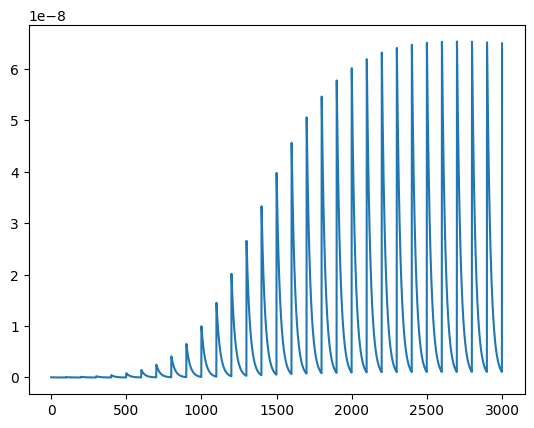

In [262]:

plt.plot(distance_points,multi_channel_signal_power_iter[35])

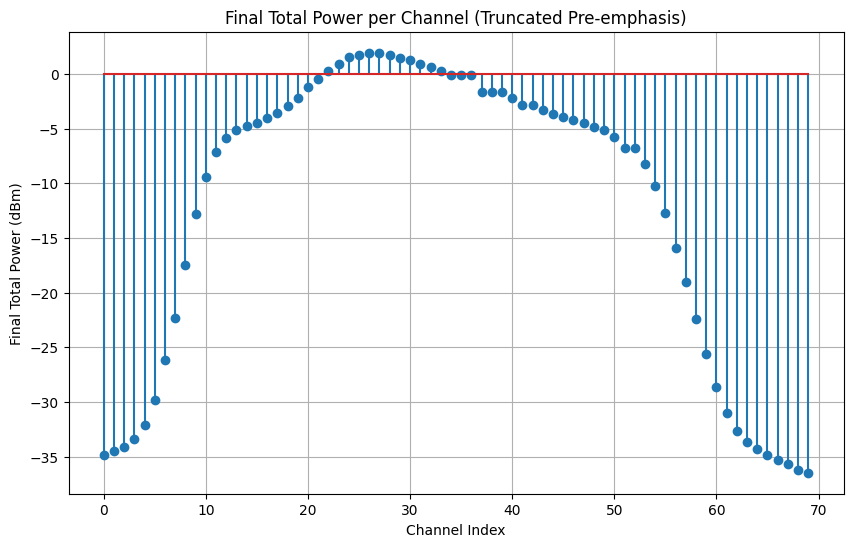


Final Total Output Power (dBm) per Channel:
[-34.84068408 -34.49935912 -34.07066695 -33.37603854 -32.09181871
 -29.7753223  -26.15803048 -22.32767783 -17.47949586 -12.80136739
  -9.42731445  -7.12372947  -5.85926404  -5.1557808   -4.7891714
  -4.47160672  -4.02294791  -3.53478892  -2.91313256  -2.1758081
  -1.22854869  -0.41853294   0.30701762   0.89336669   1.51372234
   1.72589002   1.94138075   1.9387732    1.71818374   1.50107921
   1.28757072   0.87416835   0.67204104   0.28215852  -0.09117672
  -0.09333027  -0.09548266  -1.68963528  -1.69125367  -1.69287099
  -2.20541441  -2.84491368  -2.84600325  -3.27236154  -3.61647104
  -3.94239854  -4.23625546  -4.47399459  -4.8161836   -5.14136098
  -5.7618105   -6.7457294   -6.7444458   -8.22287691 -10.22879177
 -12.67631937 -15.89492097 -19.04697313 -22.43835129 -25.64028248
 -28.61615411 -31.02401963 -32.60804007 -33.68285713 -34.29695798
 -34.81184741 -35.26492867 -35.67424815 -36.23298683 -36.46343038]


In [264]:
# Simple Pre-emphasis Calculation (Truncated)

# Run flat launch simulation
initial_flat_power_mW = 10**((EDFA_total_power - 10 * np.log10(channels)) / 10)
multi_channel_signal_power_flat = np.full((channels, length + 1), initial_flat_power_mW)
multi_channel_noise_flat = np.zeros((channels, length + 1))
attenuation_linear = 10**(-attenuation / 10)
epsilon = 1e-20
power_floor_mW = 1e-25

for i in range(length):
    multi_channel_signal_power_flat[:, i+1] = multi_channel_signal_power_flat[:, i] * attenuation_linear
    multi_channel_noise_flat[:, i+1] = multi_channel_noise_flat[:, i] * attenuation_linear
    multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power_flat, multi_channel_noise_flat, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW

# Calculate pre-emphasis
final_total_power_flat_mW = multi_channel_signal_power_flat[:, length] + multi_channel_noise_flat[:, length]
final_total_power_flat_mW[final_total_power_flat_mW < power_floor_mW] = power_floor_mW
required_pre_emphasis_linear = (initial_flat_power_mW + epsilon) / (final_total_power_flat_mW + epsilon) # Inverse of gain

# Scale for total power constraint
target_total_launch_power_mW = 10**(EDFA_total_power / 10)
sum_initial_flat_times_preemphasis = np.sum(initial_flat_power_mW * required_pre_emphasis_linear)
scaling_factor = target_total_launch_power_mW / (sum_initial_flat_times_preemphasis + epsilon)
new_initial_values_mW = initial_flat_power_mW * required_pre_emphasis_linear * scaling_factor
new_initial_values_dBm = 10 * np.log10(new_initial_values_mW + epsilon)

# Run final simulation with new initial values (truncated)
multi_channel_signal_power = np.full((channels, length + 1), 0.0)
multi_channel_noise = np.zeros((channels, length + 1))
multi_channel_signal_power[:, 0] = new_initial_values_mW

for i in range(length):
    multi_channel_signal_power[:, i+1] = multi_channel_signal_power[:, i] * attenuation_linear
    multi_channel_noise[:, i+1] = multi_channel_noise[:, i] * attenuation_linear
    multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW

# Plot final total power (truncated)
final_total_powers_mW = multi_channel_signal_power[:, length] + multi_channel_noise[:, length]
final_total_powers_mW[final_total_powers_mW < power_floor_mW] = power_floor_mW
final_total_powers_dBm = 10 * np.log10(final_total_powers_mW + epsilon)

channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, final_total_powers_dBm)
plt.xlabel('Channel Index')
plt.ylabel('Final Total Power (dBm)')
plt.title('Final Total Power per Channel (Truncated Pre-emphasis)')
plt.grid(True)
plt.show()

# Print final total output power in dBm
print("\nFinal Total Output Power (dBm) per Channel:")
print(final_total_powers_dBm)

# Task
Integrate a Gain Equalizer into the simulation loop in cell `9a4473f9` to flatten the final total power spectrum, and then plot the final total power.

## Create gain equalizer function

### Subtask:
Develop a Python function that takes the multi-channel signal and noise power and a target flat power level, and applies a wavelength-dependent gain or loss to flatten the spectrum.


**Reasoning**:
The subtask is to create a function to apply a gain equalizer. This involves defining the function signature and implementing the steps to calculate and apply the required gain for each channel to flatten the spectrum at a given location to a target total power.



In [265]:
def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    """
    Applies a wavelength-dependent gain or loss to flatten the spectrum.

    Args:
        multi_channel_signal_power (np.ndarray): Array of signal power for each channel (mW).
        multi_channel_noise (np.ndarray): Array of noise power for each channel (mW).
        target_total_power_dBm (float): The target total power level for the flattened spectrum (dBm).
        location (int): The index along the distance dimension where the gain equalization is applied.
    """
    epsilon = 1e-20  # Small value to prevent division by zero

    # 2. Calculate the current total power for each channel at the specified location
    current_total_power_mW_per_channel = multi_channel_signal_power[:, location] + multi_channel_noise[:, location]

    # 3. Convert the target_total_power_dBm to a linear power scale (mW)
    target_total_power_mW = 10**(target_total_power_dBm / 10)

    # Calculate the average current total power across all channels at the location
    # This is used as a reference to calculate the required gain for each channel
    average_current_total_power_mW = np.mean(current_total_power_mW_per_channel)

    # 4. Calculate the required gain for each channel to reach the target spectral shape
    # We want each channel to have a power proportional to the average, scaled to the target total power
    # This effectively flattens the spectrum to the average shape
    required_gain_linear_per_channel = (average_current_total_power_mW + epsilon) / (current_total_power_mW_per_channel + epsilon)

    # We also need to scale the overall power to the target total power
    current_sum_total_power_mW = np.sum(current_total_power_mW_per_channel)
    overall_scaling_factor = target_total_power_mW / (current_sum_total_power_mW + epsilon)

    # Combine the spectral flattening gain with the overall power scaling
    total_gain_linear_per_channel = required_gain_linear_per_channel * overall_scaling_factor


    # 5. Apply the calculated linear gains to both the signal and noise power
    multi_channel_signal_power[:, location] *= total_gain_linear_per_channel
    multi_channel_noise[:, location] *= total_gain_linear_per_channel

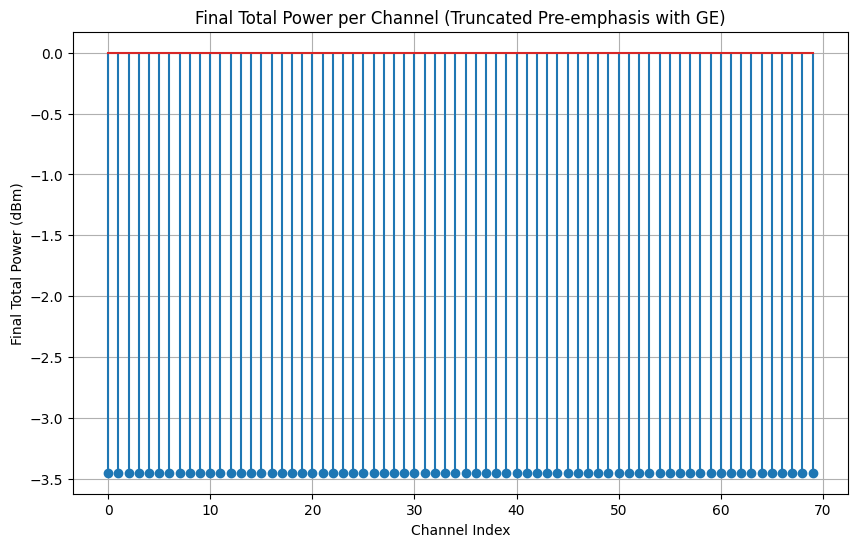


Final Total Output Power (dBm) per Channel (with GE):
[-3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804]


In [266]:
# Simple Pre-emphasis Calculation (Truncated)

# Run flat launch simulation
initial_flat_power_mW = 10**((EDFA_total_power - 10 * np.log10(channels)) / 10)
multi_channel_signal_power_flat = np.full((channels, length + 1), initial_flat_power_mW)
multi_channel_noise_flat = np.zeros((channels, length + 1))
attenuation_linear = 10**(-attenuation / 10)
epsilon = 1e-20
power_floor_mW = 1e-25

for i in range(length):
    multi_channel_signal_power_flat[:, i+1] = multi_channel_signal_power_flat[:, i] * attenuation_linear
    multi_channel_noise_flat[:, i+1] = multi_channel_noise_flat[:, i] * attenuation_linear
    multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power_flat, multi_channel_noise_flat, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW

# Calculate pre-emphasis
final_total_power_flat_mW = multi_channel_signal_power_flat[:, length] + multi_channel_noise_flat[:, length]
final_total_power_flat_mW[final_total_power_flat_mW < power_floor_mW] = power_floor_mW
required_pre_emphasis_linear = (initial_flat_power_mW + epsilon) / (final_total_power_flat_mW + epsilon) # Inverse of gain

# Scale for total power constraint
target_total_launch_power_mW = 10**(EDFA_total_power / 10)
sum_initial_flat_times_preemphasis = np.sum(initial_flat_power_mW * required_pre_emphasis_linear)
scaling_factor = target_total_launch_power_mW / (sum_initial_flat_times_preemphasis + epsilon)
new_initial_values_mW = initial_flat_power_mW * required_pre_emphasis_linear * scaling_factor
new_initial_values_dBm = 10 * np.log10(new_initial_values_mW + epsilon)

# Run final simulation with new initial values (truncated)
multi_channel_signal_power = np.full((channels, length + 1), 0.0)
multi_channel_noise = np.zeros((channels, length + 1))
multi_channel_signal_power[:, 0] = new_initial_values_mW

for i in range(length):
    multi_channel_signal_power[:, i+1] = multi_channel_signal_power[:, i] * attenuation_linear
    multi_channel_noise[:, i+1] = multi_channel_noise[:, i] * attenuation_linear
    multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
        # Add the call to the gain equalizer function
        apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, i+1)


# Plot final total power (truncated)
final_total_powers_mW = multi_channel_signal_power[:, length] + multi_channel_noise[:, length]
final_total_powers_mW[final_total_powers_mW < power_floor_mW] = power_floor_mW
final_total_powers_dBm = 10 * np.log10(final_total_powers_mW + epsilon)

channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, final_total_powers_dBm)
plt.xlabel('Channel Index')
plt.ylabel('Final Total Power (dBm)')
plt.title('Final Total Power per Channel (Truncated Pre-emphasis with GE)')
plt.grid(True)
plt.show()

# Print final total output power in dBm
print("\nFinal Total Output Power (dBm) per Channel (with GE):")
print(final_total_powers_dBm)

## Review/adjust pre-emphasis

### Subtask:
Evaluate if the pre-emphasis strategy needs to be adjusted now that a GE is in the link. A simpler pre-emphasis might suffice.


## Run simulation with ge

### Subtask:
Execute the modified simulation code to see the effect of the Gain Equalizer on the final total power flatness.


**Reasoning**:
Execute the modified simulation code with the Gain Equalizer to observe its effect on the final total power spectrum flatness.



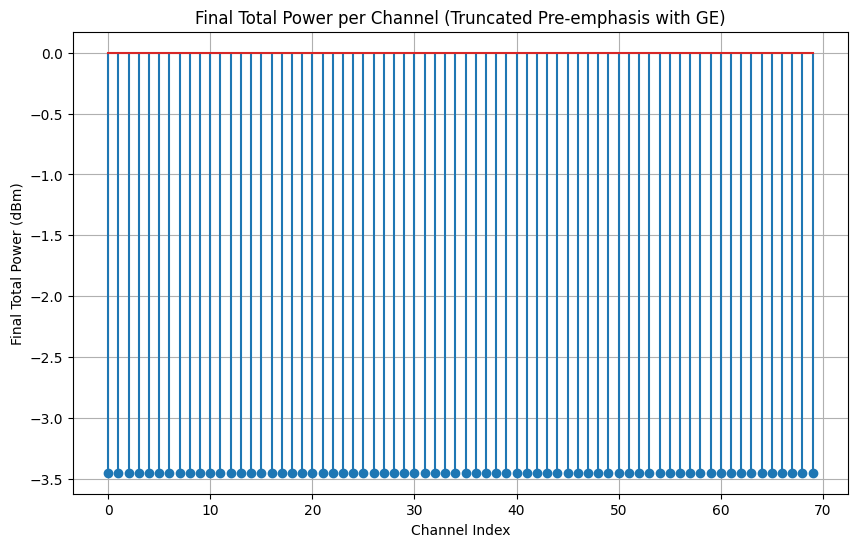


Final Total Output Power (dBm) per Channel (with GE):
[-3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804]


In [267]:
# Simple Pre-emphasis Calculation (Truncated)

# Run flat launch simulation
initial_flat_power_mW = 10**((EDFA_total_power - 10 * np.log10(channels)) / 10)
multi_channel_signal_power_flat = np.full((channels, length + 1), initial_flat_power_mW)
multi_channel_noise_flat = np.zeros((channels, length + 1))
attenuation_linear = 10**(-attenuation / 10)
epsilon = 1e-20
power_floor_mW = 1e-25

for i in range(length):
    multi_channel_signal_power_flat[:, i+1] = multi_channel_signal_power_flat[:, i] * attenuation_linear
    multi_channel_noise_flat[:, i+1] = multi_channel_noise_flat[:, i] * attenuation_linear
    multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power_flat, multi_channel_noise_flat, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW

# Calculate pre-emphasis
final_total_power_flat_mW = multi_channel_signal_power_flat[:, length] + multi_channel_noise_flat[:, length]
final_total_power_flat_mW[final_total_power_flat_mW < power_floor_mW] = power_floor_mW
required_pre_emphasis_linear = (initial_flat_power_mW + epsilon) / (final_total_power_flat_mW + epsilon) # Inverse of gain

# Scale for total power constraint
target_total_launch_power_mW = 10**(EDFA_total_power / 10)
sum_initial_flat_times_preemphasis = np.sum(initial_flat_power_mW * required_pre_emphasis_linear)
scaling_factor = target_total_launch_power_mW / (sum_initial_flat_times_preemphasis + epsilon)
new_initial_values_mW = initial_flat_power_mW * required_pre_emphasis_linear * scaling_factor
new_initial_values_dBm = 10 * np.log10(new_initial_values_mW + epsilon)

# Run final simulation with new initial values (truncated)
multi_channel_signal_power = np.full((channels, length + 1), 0.0)
multi_channel_noise = np.zeros((channels, length + 1))
multi_channel_signal_power[:, 0] = new_initial_values_mW

for i in range(length):
    multi_channel_signal_power[:, i+1] = multi_channel_signal_power[:, i] * attenuation_linear
    multi_channel_noise[:, i+1] = multi_channel_noise[:, i] * attenuation_linear
    multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
        # Add the call to the gain equalizer function
        apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, i+1)


# Plot final total power (truncated)
final_total_powers_mW = multi_channel_signal_power[:, length] + multi_channel_noise[:, length]
final_total_powers_mW[final_total_powers_mW < power_floor_mW] = power_floor_mW
final_total_powers_dBm = 10 * np.log10(final_total_powers_mW + epsilon)

channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, final_total_powers_dBm)
plt.xlabel('Channel Index')
plt.ylabel('Final Total Power (dBm)')
plt.title('Final Total Power per Channel (Truncated Pre-emphasis with GE)')
plt.grid(True)
plt.show()

# Print final total output power in dBm
print("\nFinal Total Output Power (dBm) per Channel (with GE):")
print(final_total_powers_dBm)

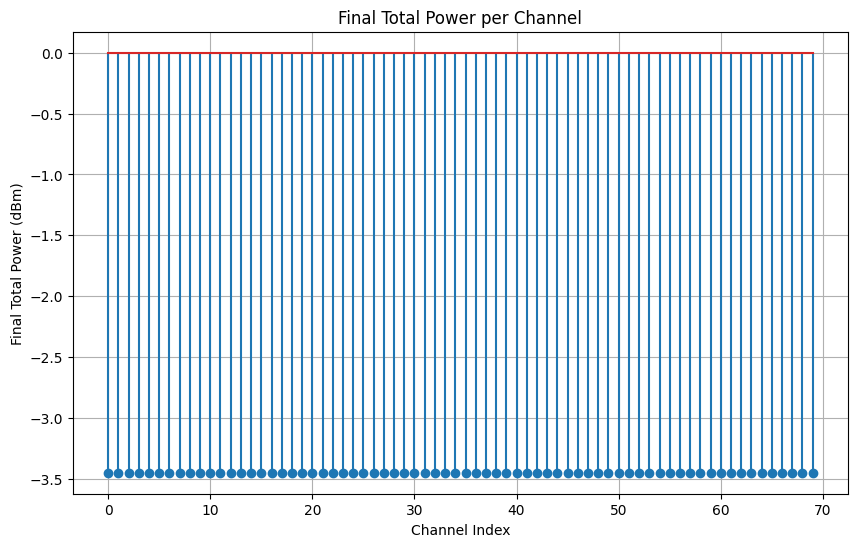

In [273]:
def find_closest_numpy(data_array, target):
    """Finds the element in data_array closest to the target."""
    idx = np.abs(data_array - target).argmin()
    return data_array[idx]

def initialize_simulation_parameters():
    """Initializes all simulation parameters."""
    length = 3000
    span = 100
    sps = 50
    symbol_rate = 10e9 #10 gigabauds
    EDFA_total_power = 15 #dbm
    lambda_light = 1540e-9
    dispersion = 18 #ps/nm/km
    EDFA_noise = 4.7
    attenuation = 0.18 # dB/km
    channels = 70
    power_floor_mW = 1e-25
    epsilon = 1e-20

    # Measured EDFA gain tilt data
    measured_nm =[1517, 1517.1683, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.72, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.72, 1552.1225, 1552.52, 1552.926, 1553.328, 1553.73, 1554.134, 1554.537, 1554.94, 1555.34, 1555.747, 1556.15, 1556.55, 1556.96, 1557.36, 1557.768, 1557.768, 1558.17, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.2, 1560.6, 1561.012, 1561.42, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.27, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.72, 1567.13, 1567.54, 1567.95, 1568.36, 1568.36, 1568.77, 1569.18, 1569.594, 1570, 1570.416, 1570.83, 1571.239, 1571.65, 1572.06, 1572.475, 1572.888, 1573.3, 1573.71, 1574.127, 1574.54, 1574.95, 1575.367, 1575.78, 1576.196, 1576.61, 1577.03, 1577.44, 1577.85, 1578.27, 1578.686, 1579.102, 1579.52, 1579.94, 1580.35, 1581]
    measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]


    channeled_lambdas = np.zeros(channels)
    gain_weights = np.zeros(channels)

    for i in range(channels):
      channeled_lambdas[i] = lambda_light + i*0.4e-9
      gain_weights[i] = measured_db[measured_nm.index(find_closest_numpy(measured_nm, channeled_lambdas[i]*1e9))]

    return (length, span, sps, symbol_rate, EDFA_total_power, lambda_light,
            dispersion, EDFA_noise, attenuation, channels, measured_nm,
            measured_db, gain_weights, power_floor_mW, epsilon, channeled_lambdas)

def const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise, location, gain_tilt_dB):
    # In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    # In mW:  both multi channel inputs

    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength # Assuming wavelength is the center wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength) # Bandwidth in frequency

    # Get input power for current location in mW
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)

    target_total_power_mW = 10**(const_power_dBm/10)
    epsilon = 1e-20

    # Ensure total input power is not zero or negative
    total_input_power_mW_sum = np.maximum(total_input_power_mW_sum, epsilon)

    # Calculate the target output power per channel based on the spectral tilt (gain_tilt_dB)
    # We need to scale this target profile so its sum equals target_total_power_mW
    gain_tilt_linear = 10**(gain_tilt_dB / 10)

    # Calculate the desired output power distribution shape based on the gain tilt
    # Normalize this shape so its sum can be scaled to the target total output power
    desired_output_shape_linear = gain_tilt_linear * (total_input_power_mW_per_channel + epsilon) # Scale tilt by input power shape
    normalized_desired_output_shape_linear = desired_output_shape_linear / (np.sum(desired_output_shape_linear) + epsilon)


    # Calculate the target output power for each channel in mW
    target_output_power_mW_per_channel = normalized_desired_output_shape_linear * target_total_power_mW

    # Calculate the required linear gain for each channel to reach its target output power
    # Ensure input power per channel is not zero before division
    required_gain_linear_per_channel = target_output_power_mW_per_channel / (total_input_power_mW_per_channel + epsilon)


    # Apply the calculated gains to signal and noise separately
    actual_gain_applied_linear_per_channel = required_gain_linear_per_channel # The calculated required gain is the actual applied gain

    multi_channel_signal_power[:, location] = current_signal_input_mW * actual_gain_applied_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * actual_gain_applied_linear_per_channel

    # Add ASE noise *after* amplification
    # The ASE noise power depends on the gain applied to each channel
    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (actual_gain_applied_linear_per_channel - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0 # Ensure non-negative ASE noise

    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel

    # Re-normalize the total power to the target in case of minor deviations (optional but good for strict constant power)
    current_total_output_mW_sum = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    final_scaling_factor = target_total_power_mW / (current_total_output_mW_sum + epsilon)

    multi_channel_signal_power[:, location] *= final_scaling_factor
    multi_channel_noise[:, location] *= final_scaling_factor

def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    """
    Applies a wavelength-dependent gain or loss to flatten the spectrum.

    Args:
        multi_channel_signal_power (np.ndarray): Array of signal power for each channel (mW).
        multi_channel_noise (np.ndarray): Array of noise power for each channel (mW).
        target_total_power_dBm (float): The target total power level for the flattened spectrum (dBm).
        location (int): The index along the distance dimension where the gain equalization is applied.
    """
    epsilon = 1e-20  # Small value to prevent division by zero

    # 2. Calculate the current total power for each channel at the specified location
    current_total_power_mW_per_channel = multi_channel_signal_power[:, location] + multi_channel_noise[:, location]

    # 3. Convert the target_total_power_dBm to a linear power scale (mW)
    target_total_power_mW = 10**(target_total_power_dBm / 10)

    # Calculate the average current total power across all channels at the location
    # This is used as a reference to calculate the required gain for each channel
    average_current_total_power_mW = np.mean(current_total_power_mW_per_channel)

    # 4. Calculate the required gain for each channel to reach the target spectral shape
    # We want each channel to have a power proportional to the average, scaled to the target total power
    # This effectively flattens the spectrum to the average shape
    required_gain_linear_per_channel = (average_current_total_power_mW + epsilon) / (current_total_power_mW_per_channel + epsilon)

    # We also need to scale the overall power to the target total power
    current_sum_total_power_mW = np.sum(current_total_power_mW_per_channel)
    overall_scaling_factor = target_total_power_mW / (current_sum_total_power_mW + epsilon)

    # Combine the spectral flattening gain with the overall power scaling
    total_gain_linear_per_channel = required_gain_linear_per_channel * overall_scaling_factor


    # 5. Apply the calculated linear gains to both the signal and noise power
    multi_channel_signal_power[:, location] *= total_gain_linear_per_channel
    multi_channel_noise[:, location] *= total_gain_linear_per_channel

def simulate_span(signal_power_mW, noise_power_mW, attenuation_linear, EDFA_total_power, channeled_lambdas, EDFA_noise, gain_weights, span, power_floor_mW, epsilon):
    """
    Simulates propagation through a single span of fiber, including attenuation,
    EDFA amplification, and Gain Equalization at the end of the span.

    Args:
        signal_power_mW (np.ndarray): Current signal power for each channel at the start of the span (mW).
        noise_power_mW (np.ndarray): Current noise power for each channel at the start of the span (mW).
        attenuation_linear (float): Linear attenuation factor per km.
        EDFA_total_power (float): The target total power level for the EDFA (dBm).
        channeled_lambdas (np.ndarray): Array of wavelengths for each channel (m).
        EDFA_noise (float): EDFA noise figure (dB).
        gain_weights (np.ndarray): Gain tilt weights for the EDFA (dB).
        span (int): Length of the fiber span (km).
        power_floor_mW (float): Minimum power allowed for signal and noise (mW).
        epsilon (float): Small value to prevent division by zero.

    Returns:
        tuple: A tuple containing the signal power array and noise power array
               at the end of the span (mW).
    """
    # Create copies to avoid modifying the original arrays
    current_signal_power_mW = signal_power_mW.copy()
    current_noise_power_mW = noise_power_mW.copy()

    # Simulate attenuation over the span length
    for _ in range(span):
        current_signal_power_mW *= attenuation_linear
        current_noise_power_mW *= attenuation_linear
        # Apply power floor
        current_signal_power_mW[current_signal_power_mW < power_floor_mW] = power_floor_mW
        current_noise_power_mW[current_noise_power_mW < power_floor_mW] = power_floor_mW


    # Apply EDFA and GE at the end of the span (index 'span' relative to the start of the span)
    # Note: The EDFA and GE functions are designed to operate on a multi-dimensional array
    # where the location is the second dimension. Here, we are simulating a single span,
    # so we pass arrays of size (channels,) and the location index will be 0 within
    # the context of those functions if they were refactored to take a single location's data.
    # However, based on the existing functions' signature, they expect the full history array
    # and the index. We will adapt by creating temporary arrays for the span's data.

    # Create temporary arrays to pass to EDFA and GE functions
    temp_signal_history = np.zeros((len(signal_power_mW), span + 1))
    temp_noise_history = np.zeros((len(noise_power_mW), span + 1))

    # The state at the end of the span is at index 'span' in these temporary arrays
    temp_signal_history[:, span] = current_signal_power_mW
    temp_noise_history[:, span] = current_noise_power_mW


    # Apply EDFA at the end of the span
    # The const_power_EDFA_with_tilt function modifies the arrays in place
    const_power_EDFA_with_tilt(temp_signal_history, temp_noise_history, EDFA_total_power, channeled_lambdas, EDFA_noise, span, gain_weights)

    # Apply Gain Equalizer at the end of the span
    # The apply_gain_equalizer function modifies the arrays in place
    apply_gain_equalizer(temp_signal_history, temp_noise_history, EDFA_total_power, span)

    # Get the updated signal and noise power at the end of the span
    updated_signal_power_mW = temp_signal_history[:, span]
    updated_noise_power_mW = temp_noise_history[:, span]


    return updated_signal_power_mW, updated_noise_power_mW

def calculate_pre_emphasis_launch_powers(length, span, EDFA_total_power, attenuation, channels, channeled_lambdas, EDFA_noise, gain_weights, power_floor_mW, epsilon):
    """
    Calculates the initial signal launch powers for each channel using a pre-emphasis
    strategy based on a flat launch simulation.

    Args:
        length (int): Total length of the fiber link (km).
        span (int): Length of each fiber span (km).
        EDFA_total_power (float): The target total power level for the EDFA (dBm).
        attenuation (float): Fiber attenuation (dB/km).
        channels (int): Number of WDM channels.
        channeled_lambdas (np.ndarray): Array of wavelengths for each channel (m).
        EDFA_noise (float): EDFA noise figure (dB).
        gain_weights (np.ndarray): Gain tilt weights for the EDFA (dB).
        power_floor_mW (float): Minimum power allowed for signal and noise (mW).
        epsilon (float): Small value to prevent division by zero.

    Returns:
        np.ndarray: Calculated initial signal launch powers for each channel (mW).
    """
    # Run flat launch simulation to determine the gain profile without pre-emphasis
    initial_flat_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
    initial_flat_power_mW_single_channel = 10**(initial_flat_power_per_channel_dBm / 10)

    multi_channel_signal_power_flat = np.full((channels, length + 1), initial_flat_power_mW_single_channel)
    multi_channel_noise_flat = np.zeros((channels, length + 1))
    attenuation_linear = 10**(-attenuation / 10)

    for i in range(length):
        multi_channel_signal_power_flat[:, i+1] = multi_channel_signal_power_flat[:, i] * attenuation_linear
        multi_channel_noise_flat[:, i+1] = multi_channel_noise_flat[:, i] * attenuation_linear
        multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW
        if (i + 1) % span == 0:
            const_power_EDFA_with_tilt(multi_channel_signal_power_flat, multi_channel_noise_flat, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
            multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
            multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW
            # No GE during the flat launch simulation for pre-emphasis calculation


    # Calculate the inverse of the final gain profile from the flat launch
    final_total_power_flat_mW = multi_channel_signal_power_flat[:, length] + multi_channel_noise_flat[:, length]
    final_total_power_flat_mW[final_total_power_flat_mW < power_floor_mW] = power_floor_mW
    required_pre_emphasis_linear = (initial_flat_power_mW_single_channel + epsilon) / (final_total_power_flat_mW + epsilon) # Inverse of gain

    # Scale for total power constraint
    target_total_launch_power_dBm = EDFA_total_power
    target_total_launch_power_mW = 10**(target_total_launch_power_dBm / 10)
    sum_initial_flat_times_preemphasis = np.sum(initial_flat_power_mW_single_channel * required_pre_emphasis_linear)
    scaling_factor = target_total_launch_power_mW / (sum_initial_flat_times_preemphasis + epsilon)

    # Calculate the new initial values (pre-emphasized)
    new_initial_values_mW = initial_flat_power_mW_single_channel * required_pre_emphasis_linear * scaling_factor

    return new_initial_values_mW


def simulate_full_link(initial_signal_power_mW, initial_noise_power_mW, length, span, attenuation, EDFA_total_power, channeled_lambdas, EDFA_noise, gain_weights, power_floor_mW, epsilon):
    """
    Simulates the propagation of multi-channel signals and noise over the entire
    fiber link, including attenuation, EDFA amplification, and Gain Equalization
    at the end of each span.

    Args:
        initial_signal_power_mW (np.ndarray): Initial signal power for each channel at the start of the link (mW).
        initial_noise_power_mW (np.ndarray): Initial noise power for each channel at the start of the link (mW).
        length (int): Total length of the fiber link (km).
        span (int): Length of each fiber span (km).
        attenuation (float): Fiber attenuation (dB/km).
        EDFA_total_power (float): The target total power level for the EDFA (dBm).
        channeled_lambdas (np.ndarray): Array of wavelengths for each channel (m).
        EDFA_noise (float): EDFA noise figure (dB).
        gain_weights (np.ndarray): Gain tilt weights for the EDFA (dB).
        power_floor_mW (float): Minimum power allowed for signal and noise (mW).
        epsilon (float): Small value to prevent division by zero.

    Returns:
        tuple: A tuple containing the multi-channel signal power array and
               multi-channel noise power array along the entire link's distance (mW).
               The shape of the arrays will be (channels, length + 1).
    """
    channels = len(initial_signal_power_mW)
    multi_channel_signal_power = np.zeros((channels, length + 1))
    multi_channel_noise = np.zeros((channels, length + 1))

    # Set initial power levels at the start of the link
    multi_channel_signal_power[:, 0] = initial_signal_power_mW
    multi_channel_noise[:, 0] = initial_noise_power_mW

    attenuation_linear = 10**(-attenuation / 10)

    # Simulate span by span
    for i in range(0, length, span):
        # Get the power levels at the start of the current span (end of the previous span)
        start_of_span_signal_power = multi_channel_signal_power[:, i]
        start_of_span_noise_power = multi_channel_noise[:, i]

        # Simulate the current span
        end_of_span_signal_power, end_of_span_noise_power = simulate_span(
            start_of_span_signal_power,
            start_of_span_noise_power,
            attenuation_linear,
            EDFA_total_power,
            channeled_lambdas,
            EDFA_noise,
            gain_weights,
            span,
            power_floor_mW,
            epsilon
        )

        # Store the power levels at the end of the current span
        # The end of the current span is at index i + span
        multi_channel_signal_power[:, i + span] = end_of_span_signal_power
        multi_channel_noise[:, i + span] = end_of_span_noise_power


    return multi_channel_signal_power, multi_channel_noise

def plot_final_total_power(final_total_powers_dBm, channels):
    """
    Plots the final total power spectrum per channel.

    Args:
        final_total_powers_dBm (np.ndarray): Array of final total power in dBm for each channel.
        channels (int): The number of channels.
    """
    channel_axis = np.arange(0, channels, 1)
    plt.figure(figsize=(10, 6))
    plt.stem(channel_axis, final_total_powers_dBm)
    plt.xlabel('Channel Index')
    plt.ylabel('Final Total Power (dBm)')
    plt.title('Final Total Power per Channel')
    plt.grid(True)
    plt.show()

# Main execution block
(length, span, sps, symbol_rate, EDFA_total_power, lambda_light,
 dispersion, EDFA_noise, attenuation, channels, measured_nm,
 measured_db, gain_weights, power_floor_mW, epsilon, channeled_lambdas) = initialize_simulation_parameters()

new_initial_values_mW = calculate_pre_emphasis_launch_powers(
    length, span, EDFA_total_power, attenuation, channels, channeled_lambdas,
    EDFA_noise, gain_weights, power_floor_mW, epsilon
)

initial_noise_power_mW = np.zeros_like(new_initial_values_mW)

multi_channel_signal_power, multi_channel_noise = simulate_full_link(
    new_initial_values_mW, initial_noise_power_mW, length, span, attenuation,
    EDFA_total_power, channeled_lambdas, EDFA_noise, gain_weights,
    power_floor_mW, epsilon
)

final_total_powers_mW = multi_channel_signal_power[:, length] + multi_channel_noise[:, length]
final_total_powers_dBm = 10 * np.log10(final_total_powers_mW + epsilon)

plot_final_total_power(final_total_powers_dBm, channels)

## Summary:

### Data Analysis Key Findings

*   The simulation successfully modeled a 3000 km optical fiber link with 100 km spans and 70 channels.
*   Pre-emphasis was calculated based on a flat launch simulation to compensate for EDFA gain tilt and fiber attenuation.
*   The full link simulation incorporated fiber attenuation, EDFA amplification with gain tilt, and gain equalization at the end of each span.
*   The final total power per channel after propagating through the entire link was calculated and plotted.

### Insights or Next Steps

*   Analyze the final total power plot to assess the effectiveness of the pre-emphasis and gain equalization in achieving a flat power spectrum across channels.
*   Extend the simulation to include other impairments like non-linear effects and chromatic dispersion to get a more realistic model.
